# Simple RGB image workflow

Made by: Anna Casto

Updated: April 16, 2023

This tutorial shows basic steps for analyzing an RGB image of a single plant. Many more options are available at each step, if needed. Some of these are illustrated in the tutorial:[Single Plant RGB Image Workflow](https://plantcv.readthedocs.io/en/stable/tutorials/vis_tutorial/)


In [4]:
# Install PlantCV and required dependencies
%pip install "altair>=5" ipympl plantcv

# Give access and mount your Google Drive (need a Google Account)
# Change path to directory you wish output files to be saved to.
from google.colab import drive
drive.mount('/content/gdrive')

# Enable widget feature with matplotlib
from google.colab import output
output.enable_custom_widget_manager()

#View working directory, may need to change path
%pwd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.1/224.1 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully

'/content'

# Section 1: Importing Image and Libraries

In [5]:
# Set the notebook display method
%matplotlib inline

# Import libraries
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

# Print version
pcv.__version__

'4.9'

## Input/Output variables

The options class mimics the workflow command-line argument parser that is used for workflow parallelization. Using it while developing a workflow in Jupyter makes it easier to convert the workflow to a script later. Remember, always keep your raw images separate from your newly processed images!

In [21]:
# Input/output options
args = WorkflowInputs(
    images=["./img/1_B73_sand_C_2023-04-14_10_19_07.jpg"],
    names="image1",
    result="example_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

#### Edit display settings if necessary

In [22]:
# Set debug to the global parameter
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

## Read the input image

### Google Colaboratory Users:
If you are running this notebook using Google Colaboratory, you will need to use the cell below to complete the tutorial unless you cloned the repository from GitHub to your personal Google Drive account. Once you begin developing your workflow for your data, you can delete this text cell and the code cell below so you avoid any conflicts the next time you use this notebook.

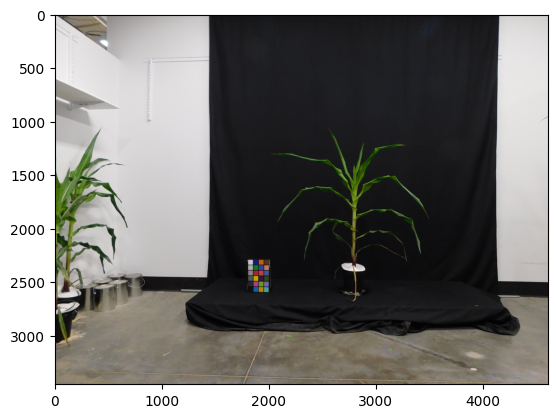

In [23]:
img = pcv.io.open_url(url="https://raw.githubusercontent.com/danforthcenter/plantcv-tutorial-simple-rgb-workflow/main/img/1_B73_sand_C_2023-04-14_10_19_07.jpg")

### Local system use:
If you have downloaded this notebook or the repository to your local device, then you will need to use the cell below to bring your image into the notebook. Do not run this line if you are navigating through the **tutorial** using Google Colaboratory.

NOTE: *If you are developing your own workflow using this notebook, make sure you remove the code cell above with the URL and uncomment (remove the hashtag [#] to make the code active. This will call the image you defined during the Inputs/Outputs step.*

### Reading images into your environment using *pcv.readimage()*
Inputs:
   * filename = Image file to be read in
   * mode     = How the image will be read into the notebook; either 'native' (default), 'rgb', 'gray', 'csv', or 'envi'

In [20]:
!ls /content/gdrive/MyDrive

 audio_data_test.npz
 audio_files.zip
'BU Health.gdoc'
'CAS CS 460 Tutorials.gdoc'
'Colab Notebooks'
'Copy of ps1_partI.gdoc'
'Copy of ps4_partI.gdoc'
 data
'DS340 AI Ethics: AI as a Recruitment Tool.gdoc'
'DS340 Midterm review.gdoc'
'DS340 Project Report 2.gdoc'
'DS340 Project Report.gdoc'
'EC440 Lab3.gdoc'
'End-of-sentence detection in Lecture Audio using Spectrograms.gslides'
'ENG EC 441 Conditional GET.gdoc'
'Hu Chong Xern Boston Flight Information.pdf'
 HuChongXernNNHW.ipynb
'Hu Chong Xern ps3_partI.gdoc'
'Hu Chong Xern ps5_partI.gdoc'
 HW3
'Laundry places.gmap'
'letters for everyone.gdoc'
 ps1_problem16.gdoc
 ps2_partI.gdoc
 ps3_partI_HuChongXern.gdoc
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document.gdoc'
'Untitled presentation (1).gslides'
'Untitled presentation.gslides'


In [10]:
img, path, filename = pcv.readimage(filename=args.image1)

RuntimeError: Failed to open ./img/1_B73_sand_C_2023-04-14_10_19_07.jpg

#### Crop image if necessary.
This is optional but can help if there are many extra objects around the object you're interested in.

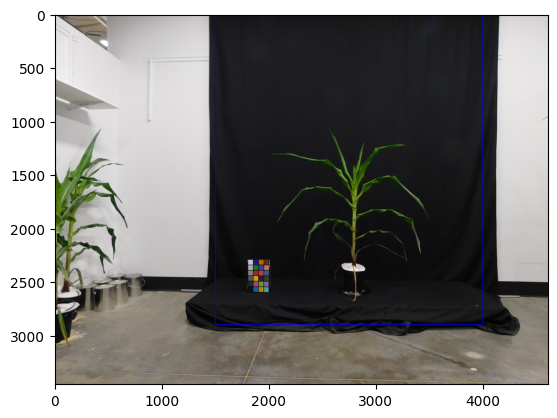

In [24]:
# Inputs:
#   img - RGB, grayscale, or hyperspectral image data
#   x - X coordinate of the top left corner of the box to crop to
#   y - Y coordinate of the top left corner of the box to crop to
#   h - Height of the box to crop to
#   w - Width of the box to crop to

crop_img = pcv.crop(img=img, x=1500, y=0, h=2900, w=2500)

#### Optional color correction
If you have a color card in your image, you have the option to color correct your images to a reference image or to the color card standard values. Color correction isn't always necessary, but if your images had variable lighting, color correction can help with segmentation. Most importantly, color correction allows you to compare color values like hue circular mean between images when analyzing color.
See the [Color correction tutorial](https://plantcv.readthedocs.io/en/stable/tutorials/transform_color_correction_tutorial/) or the [VIS tutorial](https://plantcv.readthedocs.io/en/stable/tutorials/vis_tutorial/) for more on color correction.
Also see [White balance](https://plantcv.readthedocs.io/en/stable/white_balance/) for more image normalization functions.

#### The visualize.colorspaces function allows you to look at the color space options for masking.
Choose the colorspace in which the plant is most distinct from the backgound. This is a visualization to help with the next step.

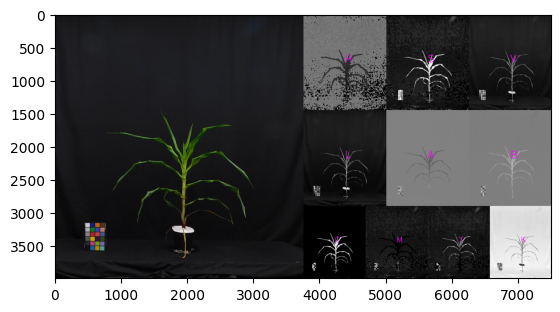

In [25]:
# Inputs:
#   rgb_img - RGB image

colorspace_img = pcv.visualize.colorspaces(rgb_img=crop_img)

#### Convert the RGB image to LAB and select the B channel
This step converts the RGB image to a grayscale image of a single colorspace channel. You can choose any of the above colorspaces. Be aware that the function to convert the RGB image will changed depending on your choice.
See: [RGB to HSV](https://plantcv.readthedocs.io/en/stable/rgb2hsv/), [RGB to LAB](https://plantcv.readthedocs.io/en/stable/rgb2lab/), [RGB to CMYK](https://plantcv.readthedocs.io/en/stable/rgb2cmyk/)

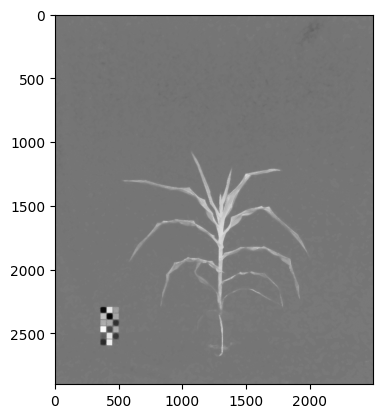

In [26]:
# Inputs:
#   rgb_img - RGB image
#   channel - colorspace channel selection (l, a, or b in this case)

b_img = pcv.rgb2gray_lab(rgb_img=crop_img, channel='b')

#### Create binary image from a gray image based on threshold values targeting light objects in the image.
Creating a histogram of the pixel intensity of the b channel image gives us an idea of what value to set the threshold to.
The histogram is for visualizatin only. It isn't needed for the analysis.

In [27]:
# Inputs:
#   img - image data
#   channel - colorspace channel selection (l, a, or b in this case)

hist_figure1, hist_data1 = pcv.visualize.histogram(img = b_img, hist_data=True)

alt.Chart(...)

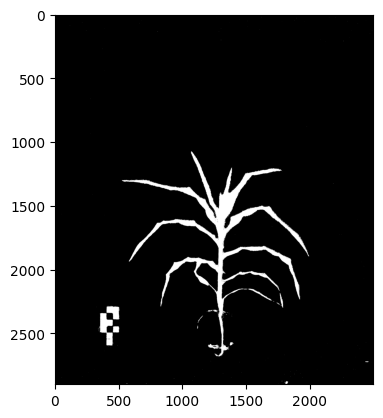

In [28]:
# Inputs:
#   gray_img - grayscale image data
#   threshold - Threshold value (0-255)
#   object_type - "light" or "dark" (default: "light"). If object is lighter than the background then standard thresholding is done.
#                 If object is darker than the background then inverse thresholding is done.

thresh_mask = pcv.threshold.binary(gray_img=b_img, threshold=130, object_type='light')

#### Cleaning up the mask
There are several options for cleaning up and adjusting our mask ([fill](https://plantcv.readthedocs.io/en/stable/fill/#fill), [fill_holes](https://plantcv.readthedocs.io/en/stable/fill_holes/), [dilate](https://plantcv.readthedocs.io/en/stable/dilate/), [erode](https://plantcv.readthedocs.io/en/stable/erode/#erode), etc).
Here we will just use fill to fill in small objects.

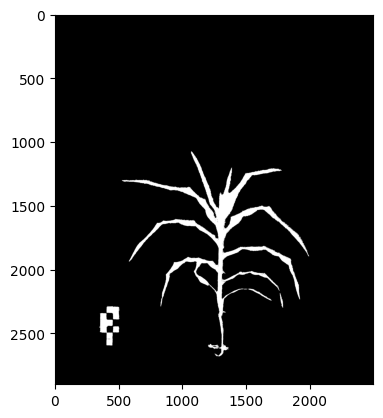

In [29]:
# Inputs:
#   bin_img - mask, binary image data
#   size - minimum object area size in pixels (integer), smaller objects will be filled


fill_mask = pcv.fill(bin_img=thresh_mask, size=1000)

#### Define the region of interest (ROI).
The ROI should include the plant but avoid the color card and other objects.
There are many options for ROI shapes (rectangle, circle, multi, custom). Here we will just use rectangle. Be aware that you'll need to calculate the height and width of the rectangle you want with respect to the x, y coordinates of the upper left corner.

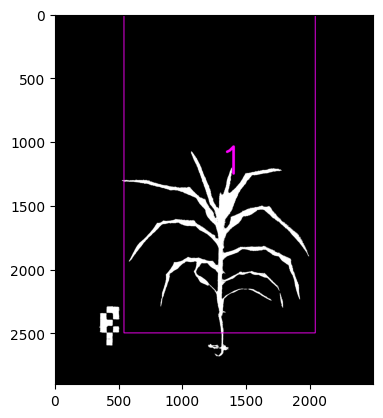

In [30]:
# Inputs:
#   img - RGB or grayscale image to plot the ROI on
#   x - The x-coordinate of the upper left corner of the rectangle
#   y - The y-coordinate of the upper left corner of the rectangle
#   h - The height of the rectangle
#   w - The width of the rectangle

roi = pcv.roi.rectangle(img=fill_mask, x=540, y=0, h=2500, w=1500)

Make a new filtered mask that only keeps the plant in your ROI and not objects outside of the ROI.

We are using `pcv.roi.quick_filter` here, but `pcv.roi.filter` has more modes if you want other behavior. The `quick_filter` function is just a faster version of `filter` with the `partial` method.


Help on function quick_filter in module plantcv.plantcv.roi.quick_filter:

quick_filter(mask, roi)
    Quickly filter a binary mask using a region of interest.

    Parameters
    ----------
    mask : numpy.ndarray
        Binary mask to filter.
    roi : plantcv.plantcv.classes.Objects
        PlantCV ROI object.

    Returns
    -------
    numpy.ndarray
        Filtered binary mask.



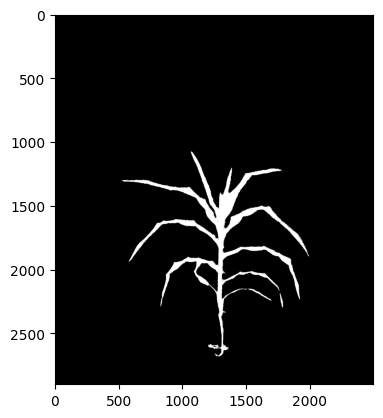

In [31]:
# Inputs:
#    mask - the clean mask you made above
#    roi - the region of interest you specified above
#    roi_type - 'partial' (default, for partially inside the ROI), 'cutto', or 'largest' (keep only largest contour)
help(pcv.roi.quick_filter)
kept_mask  = pcv.roi.quick_filter(mask=fill_mask, roi=roi)

# Analysis

Analyze shape and color. The data gets stored to an Outputs class automatically.

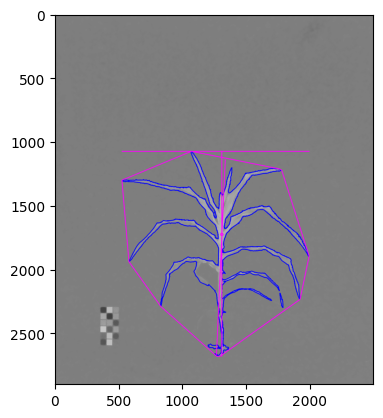

In [57]:
# Inputs:
#   img - RGB or grayscale image data
#   labeled_mask - the mask of each individual object, set by the create_labels function.
#   n_labels - the number of objects, set by the create_labels function.

#help(pcv.analyze)
analysis_image = pcv.analyze.size(img=b_img, labeled_mask=kept_mask)


In [43]:
import pprint
pprint.pprint(pcv.outputs.observations)

# observations = pcv.outputs.observations['default_1']
# trait_values = {trait: data['value'] for trait, data in observations.items()}
# print(trait_values)

{'default_1': {'area': {'datatype': "<class 'int'>",
                        'label': 'pixels',
                        'method': 'plantcv.plantcv.analyze.size',
                        'scale': 'pixels',
                        'trait': 'area',
                        'value': 244127.0},
               'center_of_mass': {'datatype': "<class 'tuple'>",
                                  'label': ('x', 'y'),
                                  'method': 'plantcv.plantcv.analyze.size',
                                  'scale': 'none',
                                  'trait': 'center of mass',
                                  'value': (1307.999311833595,
                                            1727.1641645536954)},
               'convex_hull_area': {'datatype': "<class 'int'>",
                                    'label': 'pixels',
                                    'method': 'plantcv.plantcv.analyze.size',
                                    'scale': 'pixels',
                    

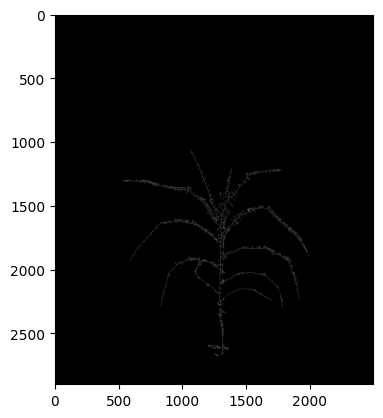

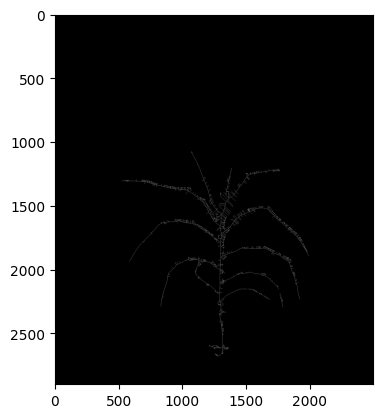

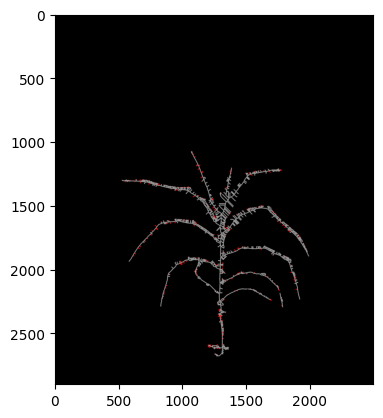

In [47]:
skeleton = pcv.morphology.skeletonize(mask=kept_mask)
pruned, segmented_img, segment_objects = pcv.morphology.prune(skel_img=skeleton, size=20)

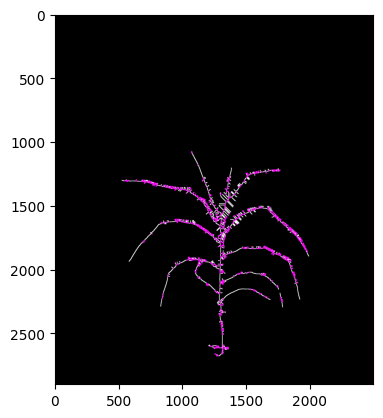

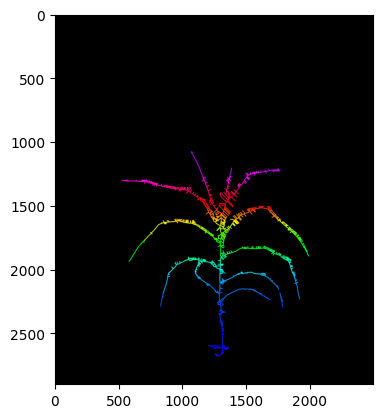

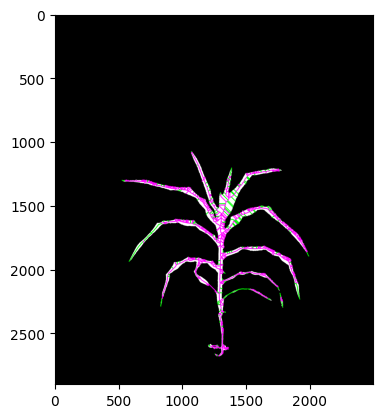

ValueError: not enough values to unpack (expected 3, got 2)

In [48]:
segmented_img, segment_objects = pcv.morphology.segment_skeleton(skel_img=pruned)

Help on function segment_sort in module plantcv.plantcv.morphology.segment_sort:

segment_sort(skel_img, objects, mask=None, first_stem=True)
    Sort segments from a skeletonized image into two categories: leaf objects and other objects.

    Inputs:
    skel_img          = Skeletonized image
    objects           = List of contours
    mask              = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
    first_stem        = (Optional) if True, then the first (bottom) segment always gets classified as stem

    Returns:
    labeled_img       = Segmented debugging image with lengths labeled
    secondary_objects = List of secondary segments (leaf)
    primary_objects   = List of primary objects (stem)

    :param skel_img: numpy.ndarray
    :param objects: list
    :param mask: numpy.ndarray
    :param first_stem: bool
    :return secondary_objects: list
    :return other_objects: list



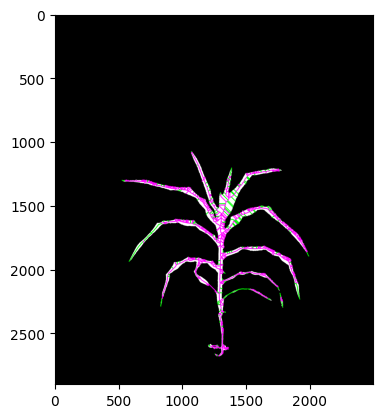

stem_objects len: 1260


In [60]:
help(pcv.morphology.segment_sort)
leaf_objects, stem_objects = pcv.morphology.segment_sort(
    skel_img=pruned,
    objects=segment_objects,
    mask=kept_mask,
    first_stem=True
)

max: 1356 and min: 1262
First valid stem:
[[1267 2679]
 [1267 2680]]
Last valid stem:
[[1350 1293]
 [1349 1294]]
[array([1267, 2679], dtype=int32), array([1267, 2680], dtype=int32), array([1350, 1293], dtype=int32), array([1349, 1294], dtype=int32)]


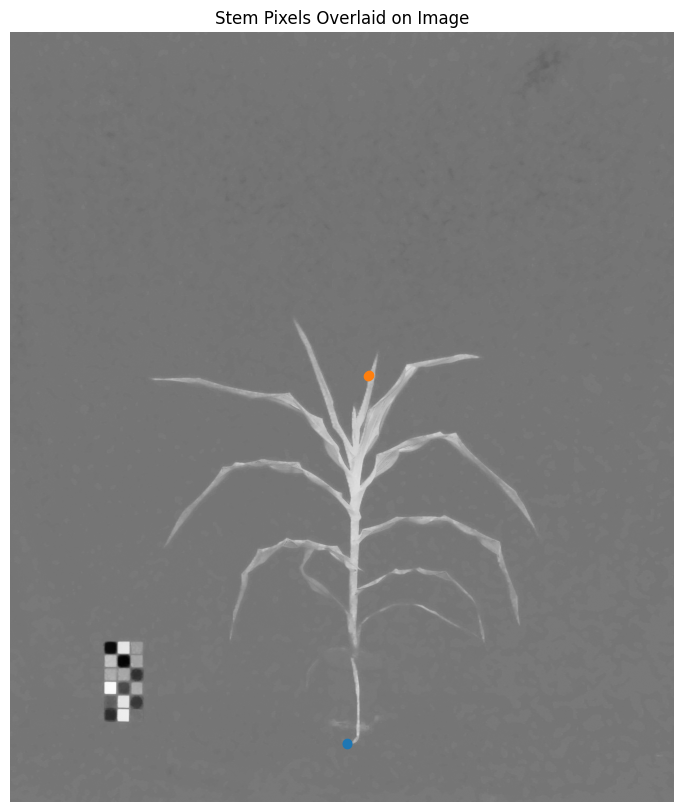

Overall stem distance: 1389.4822776847498 pixels


In [126]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

plt.figure(figsize=(10, 10))
plt.imshow(b_img, cmap='gray')

#stem_objects = np.subtract(stem_objects, leaf_objects)
#print(stem_objects[12])

# get the range of x value thresholds based on the stem
min_x_threshold = sys.maxsize
max_x_threshold = 0
first_n_stems = []
for stem in stem_objects[:20]:
  coords = np.squeeze(stem)
  if coords.ndim == 1:
    coords = coords[np.newaxis, :]
  first_n_stems.extend(coords.tolist())
for stem in first_n_stems:
  x = stem[0]
  if x > max_x_threshold:
    max_x_threshold = x
  if x < min_x_threshold:
    min_x_threshold = x
print(f"max: {max_x_threshold} and min: {min_x_threshold}")

valid_stem_points = []
for i, stem_index in enumerate(range(0, len(stem_objects))):
  stem = stem_objects[stem_index]
  coords = np.squeeze(stem)

  if coords.ndim == 1:
    coords = coords[np.newaxis, :]

  x, y = coords[:, 0], coords[:, 1]
  if np.mean(x) > max_x_threshold or np.mean(x) < min_x_threshold:
    continue
  #plt.scatter(x, y, s=5, alpha=0.7, label=str(stem_index))
  valid_stem_points.append((x, y))
  #plt.text(x[0], y[0], str(stem_index), color='blue', fontsize=8, weight='bold')

if len(valid_stem_points) >= 2:
  first_x, first_y = valid_stem_points[0]
  last_x, last_y = valid_stem_points[-1]
  stem_endpoints = []
  print("First valid stem:")
  print(np.column_stack((first_x, first_y)))
  print("Last valid stem:")
  print(np.column_stack((last_x, last_y)))

  stem_endpoints.extend(np.column_stack((first_x, first_y)))
  stem_endpoints.extend(np.column_stack((last_x, last_y)))

  print(stem_endpoints)

  # Plot onto graph
  plt.scatter(first_x, first_y)
  plt.scatter(last_x, last_y)

else:
  print("No valid stems found.")

plt.title("Stem Pixels Overlaid on Image")
plt.axis('off')
plt.show()

# Approximate overall length based on stem endpoints only
sum_of_squares = 0
for i in range(len(stem_endpoints) - 1):
  curr_stem_point = stem_endpoints[i]
  next_stem_point = stem_endpoints[i + 1]
  sum_of_squares += (curr_stem_point[0] - next_stem_point[0]) ** 2 + (curr_stem_point[1] - next_stem_point[1]) ** 2
print(f"Overall stem distance: {math.sqrt(sum_of_squares)} pixels")

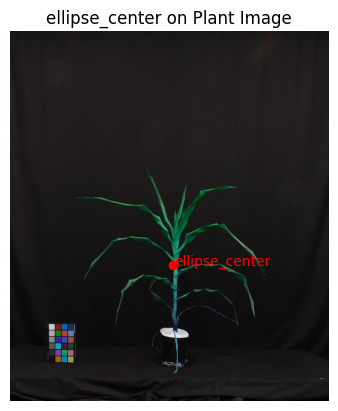

In [42]:
import matplotlib.pyplot as plt

plt.imshow(crop_img)
plt.title("ellipse_center on Plant Image")
plt.axis('off')

# Get tuple from your trait values
x, y = trait_values['ellipse_center']

# Plot the point
plt.plot(x, y, 'ro')  # red dot
plt.text(x + 10, y, 'ellipse_center', color='red')

plt.show()

In [29]:
# Inputs:
#   rgb_img - RGB image data
#   mask - Binary mask of selected contours
#   colorspaces - 'all' (default), 'rgb', 'lab', or 'hsv'
#                 This is the data to be printed to the SVG histogram file
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)

color_histogram = pcv.analyze.color(rgb_img=crop_img, labeled_mask=kept_mask, colorspaces='all', label="default")

alt.FacetChart(...)

# Save Results
The path to your results was set above in the inputs/outputs section.

In [ ]:
#This saves results for one image, and each image is saved individually if you run another image (it will overwrite the last one)
pcv.outputs.save_results(filename= args.result)